In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes = True)

In [2]:
chips = pd.read_csv('chips_customers.csv')
chips


,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,YEAR_MONTH,TXN_MONTH
0,0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium,NATURAL,201810,2018-10-01
1,1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
2,2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201808,2018-08-01
3,3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
4,4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget,DORITOS,201808,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74565,74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201811,2018-11-01
74566,74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201905,2019-05-01
74567,74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201903,2019-03-01
74568,74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,YOUNG SINGLES/COUPLES,Premium,THINS,201811,2018-11-01


In [3]:
chips = chips.loc[:,~chips.columns.str.contains('Unnamed')]
chips.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'PRODUCT', 'WEIGHT', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'BRAND', 'YEAR_MONTH', 'TXN_MONTH'],
      dtype='object')

## Selecting control stores 

The control store has to be chosen based on the entire operation period. The trial stores chosen by the customer are 77,86 and 88. 

Every trial-control pairing is tested using Pearson correlation (as the chosen measure) on the basis of:
- Monthly sales revenue
- Monthly number of customers 
- Monthly transactions 

In [4]:
chips.dtypes


DATE                 object
STORE_NBR           float64
LYLTY_CARD_NBR      float64
TXN_ID              float64
PROD_NBR            float64
PROD_QTY            float64
TOT_SALES           float64
PRODUCT              object
WEIGHT              float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
BRAND                object
YEAR_MONTH            int64
TXN_MONTH            object
dtype: object

In [5]:
#converting the dates to datetime 
import datetime
chips['DATE'] = pd.to_datetime(chips['DATE'])
chips['LIFESTAGE'] = chips['LIFESTAGE'].astype('category')
chips['PREMIUM_CUSTOMER'] = chips['PREMIUM_CUSTOMER'].astype('category')

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/1264802956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips['DATE'] = pd.to_datetime(chips['DATE'])
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/1264802956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chips['LIFESTAGE'] = chips['LIFESTAGE'].astype('category')
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/1264802956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [6]:
chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT,WEIGHT,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,YEAR_MONTH,TXN_MONTH
0,2018-10-19,1.0,1000.0,1.0,5.0,2.0,6.0,natural chip compny seasalt,175.0,YOUNG SINGLES/COUPLES,Premium,NATURAL,201810,2018-10-01
1,2019-05-22,1.0,1343.0,383.0,61.0,2.0,2.9,smiths crinkle cut chips chicken,170.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
2,2018-08-19,2.0,2373.0,974.0,69.0,5.0,15.0,smiths chip thinly s cream onion,175.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201808,2018-08-01
3,2019-05-18,4.0,4149.0,3333.0,16.0,1.0,5.7,smiths crinkle chips salt vinegar,330.0,MIDAGE SINGLES/COUPLES,Budget,SMITHS,201905,2019-05-01
4,2018-08-22,5.0,5026.0,4525.0,42.0,1.0,3.9,doritos corn chip mexican jalapeno,150.0,MIDAGE SINGLES/COUPLES,Budget,DORITOS,201808,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-06,271.0,271193.0,269365.0,33.0,2.0,7.6,cobs popd swt chlli sr cream chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201811,2018-11-01
74566,2019-05-31,271.0,271193.0,269366.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201905,2019-05-01
74567,2019-03-27,272.0,272194.0,269908.0,75.0,2.0,7.6,cobs popd sea salt chips,110.0,YOUNG SINGLES/COUPLES,Premium,COBS,201903,2019-03-01
74568,2018-11-14,272.0,272319.0,270087.0,44.0,2.0,6.6,thins chips light tangy,175.0,YOUNG SINGLES/COUPLES,Premium,THINS,201811,2018-11-01


In [7]:
#to collate total sales for each store 
totSales = chips.groupby(['STORE_NBR','YEAR_MONTH']).TOT_SALES.sum()
nCustomers = chips.groupby(['STORE_NBR','YEAR_MONTH']).LYLTY_CARD_NBR.nunique()
nTxnPerCust = chips.groupby(['STORE_NBR','YEAR_MONTH']).TXN_ID.nunique()/chips.groupby(['STORE_NBR','YEAR_MONTH']).LYLTY_CARD_NBR.nunique()
nUnitPrice = chips.groupby(['STORE_NBR','YEAR_MONTH']).TOT_SALES.sum()/chips.groupby(['STORE_NBR','YEAR_MONTH']).PROD_QTY.sum()
ChipsPerTxn = chips.groupby(['STORE_NBR','YEAR_MONTH']).PROD_QTY.sum()/chips.groupby(['STORE_NBR','YEAR_MONTH']).TXN_ID.nunique()

data = [totSales,nCustomers,nTxnPerCust,nUnitPrice,ChipsPerTxn]
#concatenate the variables into a new dataframe- measureOverTime 
measureOverTime = pd.concat(data, join = 'outer', axis=1)
measureOverTime

TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR YEAR_MONTH                                                         
1.0       201807           59.7              18  1.000000  2.985000  1.111111
          201808           52.8              16  1.000000  3.105882  1.062500
          201809           68.9              17  1.000000  3.445000  1.176471
          201810           80.3              17  1.000000  3.345833  1.411765
          201811           75.6              16  1.062500  3.286957  1.352941
...                         ...             ...       ...       ...       ...
272.0     201902           88.0              12  1.000000  3.666667  2.000000
          201903           99.1              13  1.076923  4.129167  1.714286
          201904          106.9              15  1.000000  3.817857  1.866667
          201905           96.7              13  1.000000  4.204348  1.769231
          201906           37.7               5  1.000000  4.188889  1.800000

[3285 rows x 5 columns]

In [8]:
measureOverTime.rename(columns={'TOT_SALES':'totSales','LYLTY_CARD_NBR':'nCustomers',0:'nChipsPerCust',1:'nUnitPrice',2:'ChipsPerTxn'},inplace=True)
measureOverTime.head()

totSales  nCustomers  nChipsPerCust  nUnitPrice  \
STORE_NBR YEAR_MONTH                                                    
1.0       201807          59.7          18         1.0000    2.985000   
          201808          52.8          16         1.0000    3.105882   
          201809          68.9          17         1.0000    3.445000   
          201810          80.3          17         1.0000    3.345833   
          201811          75.6          16         1.0625    3.286957   

                      ChipsPerTxn  
STORE_NBR YEAR_MONTH               
1.0       201807         1.111111  
          201808         1.062500  
          201809         1.176471  
          201810         1.411765  
          201811         1.352941

In [9]:
#Count number of transactions for each store
a = pd.pivot_table(chips, index= 'STORE_NBR', columns = 'YEAR_MONTH', values = 'TXN_ID', aggfunc = 'count')
a 

YEAR_MONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907
STORE_NBR,,,,,,,,,,,,,
1.0,18.0,16.0,17.0,17.0,17.0,12.0,6.0,13.0,22.0,12.0,15.0,16.0,2.0
2.0,12.0,9.0,11.0,16.0,10.0,10.0,20.0,12.0,10.0,16.0,15.0,10.0,1.0
3.0,34.0,35.0,28.0,40.0,25.0,35.0,30.0,35.0,34.0,28.0,28.0,28.0,2.0
4.0,44.0,47.0,49.0,52.0,36.0,31.0,43.0,40.0,42.0,32.0,31.0,37.0,6.0
5.0,30.0,28.0,33.0,34.0,45.0,36.0,29.0,30.0,24.0,31.0,25.0,32.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268.0,19.0,23.0,10.0,13.0,20.0,12.0,11.0,8.0,12.0,17.0,19.0,11.0,1.0
269.0,41.0,40.0,30.0,44.0,37.0,35.0,41.0,40.0,32.0,40.0,43.0,39.0,2.0
270.0,37.0,53.0,40.0,36.0,34.0,45.0,41.0,39.0,37.0,36.0,29.0,36.0,1.0


<AxesSubplot:xlabel='YEAR_MONTH'>

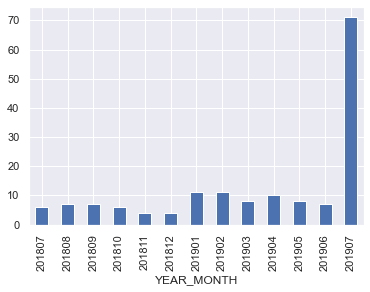

In [10]:
a.isnull().sum().plot(kind='bar')

In [11]:
null_stores = a[a.isnull().any(axis=1)].index.to_list()
null_stores

[11.0,
 14.0,
 16.0,
 17.0,
 21.0,
 22.0,
 23.0,
 31.0,
 37.0,
 38.0,
 41.0,
 42.0,
 44.0,
 52.0,
 54.0,
 61.0,
 68.0,
 73.0,
 77.0,
 79.0,
 87.0,
 93.0,
 96.0,
 98.0,
 99.0,
 103.0,
 111.0,
 112.0,
 117.0,
 120.0,
 123.0,
 126.0,
 127.0,
 131.0,
 132.0,
 135.0,
 139.0,
 140.0,
 142.0,
 146.0,
 149.0,
 151.0,
 158.0,
 159.0,
 160.0,
 161.0,
 171.0,
 173.0,
 176.0,
 177.0,
 182.0,
 185.0,
 188.0,
 190.0,
 192.0,
 194.0,
 195.0,
 198.0,
 204.0,
 218.0,
 221.0,
 224.0,
 233.0,
 234.0,
 237.0,
 239.0,
 244.0,
 248.0,
 251.0,
 258.0,
 260.0,
 262.0,
 263.0,
 264.0,
 267.0,
 272.0]

In [12]:
len(null_stores)

76

<AxesSubplot:xlabel='YEAR_MONTH'>

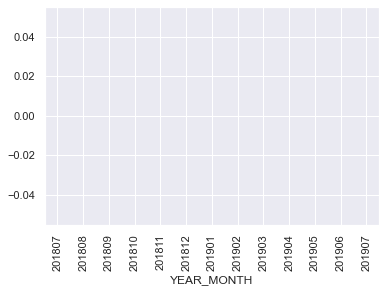

In [13]:
a = a.fillna('0')
a.isnull().sum().plot(kind='bar')

## Matching of trial stores to control stores prior February 2019 

The selection of matching control groups reduces the randomisation of the experiment. In this situation, the usage of such is done using the pearson correlation as suggested by the company and by the usage of Euclidean distance calculation between the trial stores and prospective control stores. 

To test, the metrics chosen are the total sales and number of customers per each store. Thus, matching the control store to the trial store helps in reducing the differences and improves the validity of the analysis 

In [14]:
measureOverTime.reset_index(inplace= True)
preTrialMeasures = measureOverTime.loc[measureOverTime['YEAR_MONTH']<201902,:]
len(preTrialMeasures)

1810

In [15]:
preTrialMeasures.head()

,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn
0,1.0,201807,59.7,18,1.0000,2.985000,1.111111
1,1.0,201808,52.8,16,1.0000,3.105882,1.062500
2,1.0,201809,68.9,17,1.0000,3.445000,1.176471
3,1.0,201810,80.3,17,1.0000,3.345833,1.411765
4,1.0,201811,75.6,16,1.0625,3.286957,1.352941


In [16]:
#calculating the correlation and the magnitude distance between the trial stores 77,86 and 88 with the prospective control stores 

from scipy.stats import pearsonr


what are the metrics we are looking at? : total sales, number of cusotmers 

In [17]:
# define a correlation function for a single metric between the trial and control group 
def calculateCorrelation(inputTable,metric,trial_store):
    '''This function takes a table as an input, its specified metric and the trial store
    to iterate through all the other stores and find its best control store match'''
    outputTable = pd.DataFrame({'Store_1':[],'Store_2':[],'Correlation':[]})
    a = inputTable.loc[inputTable['STORE_NBR']== trial_store,metric]
    a.reset_index(drop=True,inplace=True)
    stores = inputTable['STORE_NBR'].unique()
    for i in stores:
        b = inputTable.loc[inputTable['STORE_NBR']==i, metric]
        b.reset_index(drop= True, inplace=True)
        outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Correlation':b.corr(a)},ignore_index=True)
    return outputTable


In [18]:
trial_store = 77

#use the functions for each metric initialised previously
corr_Sales  = calculateCorrelation(preTrialMeasures,'totSales',trial_store)
corr_customers  = calculateCorrelation(preTrialMeasures,'nCustomers',trial_store)

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/2456687851.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Correlation':b.corr(a)},ignore_index=True)
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/2456687851.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Correlation':b.corr(a)},ignore_index=True)
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/2456687851.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Correlation':b.corr(a)},ignore_index=True)
/var/folders/

In [19]:
corr_Sales

,Store_1,Store_2,Correlation
0,77.0,1.0,-0.530081
1,77.0,2.0,-0.453524
2,77.0,3.0,-0.228303
3,77.0,4.0,-0.704449
4,77.0,5.0,-0.119150
...,...,...,...
260,77.0,268.0,0.233206
261,77.0,269.0,-0.384913
262,77.0,270.0,0.338236
263,77.0,271.0,-0.284743


In [20]:
# define a function to calculate magnitude difference between trial store and control store on the basis of a single metric
def calculateMagnitudeDistance(inputTable,metric,trial_store):
    '''To calculate metric difference between trial store and control stores '''
    outputTable = pd.DataFrame({'Store_1':[],'Store_2':[],'Magnitude':[]})
    a = inputTable.loc[inputTable['STORE_NBR']== trial_store,metric]
    a.reset_index(drop=True, inplace=True)
    stores = inputTable['STORE_NBR'].unique()
    for i in stores:
        b = inputTable.loc[inputTable['STORE_NBR']==i, metric]
        b.reset_index(drop=True, inplace=True)
        #standardise the magnitude distance just so it ranges from 0 to 1
        c = abs(a-b) # c= measure
        d = np.mean(1- (c-min(c))/(max(c)-min(c)))
        outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Magnitude':d},ignore_index=True)
    return outputTable

In [21]:
mag_sales = calculateMagnitudeDistance(preTrialMeasures,'totSales',trial_store)
mag_customers = calculateMagnitudeDistance(preTrialMeasures,'nCustomers',trial_store)

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/3727170066.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Magnitude':d},ignore_index=True)
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/3727170066.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Magnitude':d},ignore_index=True)
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/3727170066.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputTable = outputTable.append({'Store_1':trial_store,'Store_2':i,'Magnitude':d},ignore_index=True)
/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t0000

In [22]:
mag_sales

,Store_1,Store_2,Magnitude
0,77.0,1.0,0.385262
1,77.0,2.0,0.495676
2,77.0,3.0,0.583773
3,77.0,4.0,0.480864
4,77.0,5.0,0.545750
...,...,...,...
260,77.0,268.0,0.648707
261,77.0,269.0,0.692832
262,77.0,270.0,0.528980
263,77.0,271.0,0.625832


In [23]:
corr_Sales

,Store_1,Store_2,Correlation
0,77.0,1.0,-0.530081
1,77.0,2.0,-0.453524
2,77.0,3.0,-0.228303
3,77.0,4.0,-0.704449
4,77.0,5.0,-0.119150
...,...,...,...
260,77.0,268.0,0.233206
261,77.0,269.0,-0.384913
262,77.0,270.0,0.338236
263,77.0,271.0,-0.284743


In [24]:
scores_nSales = pd.concat([corr_Sales,mag_sales['Magnitude']],axis=1)
corr_weight = 0.5
scores_nSales['scoreNSales'] = corr_weight * corr_Sales['Correlation'] + scores_nSales['Magnitude']


In [25]:
scores_nSales

,Store_1,Store_2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,-0.530081,0.385262,0.120221
1,77.0,2.0,-0.453524,0.495676,0.268914
2,77.0,3.0,-0.228303,0.583773,0.469621
3,77.0,4.0,-0.704449,0.480864,0.128640
4,77.0,5.0,-0.119150,0.545750,0.486176
...,...,...,...,...,...
260,77.0,268.0,0.233206,0.648707,0.765310
261,77.0,269.0,-0.384913,0.692832,0.500376
262,77.0,270.0,0.338236,0.528980,0.698098
263,77.0,271.0,-0.284743,0.625832,0.483461


In [26]:
scores_nCustomers = pd.concat([corr_customers,mag_customers['Magnitude']],axis=1)

scores_nCustomers['scoreNCustomers'] =  corr_weight * corr_customers['Correlation'] +  scores_nCustomers['Magnitude']
scores_nCustomers.head()

,Store_1,Store_2,Correlation,Magnitude,scoreNCustomers
0,77.0,1.0,0.265488,0.673469,0.806214
1,77.0,2.0,-0.525061,0.371429,0.108898
2,77.0,3.0,-0.410463,0.523810,0.318578
3,77.0,4.0,-0.356413,0.515528,0.337321
4,77.0,5.0,0.083962,0.542857,0.584838


In [27]:
scores_nSales.set_index(['Store_1','Store_2'],inplace=True)
scores_nCustomers.set_index(['Store_1','Store_2'],inplace=True)
#merge both the dataframes as score_Control
score_Control = pd.concat([scores_nSales['scoreNSales'],scores_nCustomers['scoreNCustomers']],axis=1)
score_Control.head()

scoreNSales  scoreNCustomers
Store_1 Store_2                              
77.0    1.0         0.120221         0.806214
        2.0         0.268914         0.108898
        3.0         0.469621         0.318578
        4.0         0.128640         0.337321
        5.0         0.486176         0.584838

In [28]:
#assigning a final score that is a sum of the sales score and customer customer with a weight 
score_Control['finalNScore'] = score_Control['scoreNSales']*0.5 + score_Control['scoreNCustomers']*0.5
score_Control

scoreNSales  scoreNCustomers  finalNScore
Store_1 Store_2                                           
77.0    1.0         0.120221         0.806214     0.463218
        2.0         0.268914         0.108898     0.188906
        3.0         0.469621         0.318578     0.394100
        4.0         0.128640         0.337321     0.232981
        5.0         0.486176         0.584838     0.535507
...                      ...              ...          ...
        268.0       0.765310         0.901250     0.833280
        269.0       0.500376         0.574978     0.537677
        270.0       0.698098         0.419842     0.558970
        271.0       0.483461         0.492827     0.488144
        272.0       0.393675         0.452896     0.423286

[265 rows x 3 columns]

In [29]:
score_Control.sort_values(by='finalNScore',ascending=False)

scoreNSales  scoreNCustomers  finalNScore
Store_1 Store_2                                           
77.0    57.0        1.023371         0.981844     1.002607
        245.0       0.928468         1.020634     0.974551
        94.0        0.956479         0.974059     0.965269
        38.0        0.914080         0.955200     0.934640
        265.0       0.841368         1.022245     0.931806
...                      ...              ...          ...
        258.0      -0.004716        -0.003768    -0.004242
        11.0        0.000000              NaN          NaN
        31.0             NaN              NaN          NaN
        77.0             NaN              NaN          NaN
        139.0       0.028196              NaN          NaN

[265 rows x 3 columns]

The chosen control store for store 77 is 94 

In [30]:
trial_store

77

In [31]:
#set control store as 223
control_store = 94

#to categorise the stores in preTrialMeasures
pastSales = preTrialMeasures
store_type = []
for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('TRIAL STORE')
    elif i == control_store:
        store_type.append('CONTROL STORE')
    else:
        store_type.append('OTHER STORES')
pastSales['store_type'] = store_type
pastSales.head()

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/2485399493.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,store_type
0,1.0,201807,59.7,18,1.0000,2.985000,1.111111,OTHER STORES
1,1.0,201808,52.8,16,1.0000,3.105882,1.062500,OTHER STORES
2,1.0,201809,68.9,17,1.0000,3.445000,1.176471,OTHER STORES
3,1.0,201810,80.3,17,1.0000,3.345833,1.411765,OTHER STORES
4,1.0,201811,75.6,16,1.0625,3.286957,1.352941,OTHER STORES


In [32]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEAR_MONTH'].astype(str), format = '%Y%m')
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 0 to 3279
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   STORE_NBR         1810 non-null   float64       
 1   YEAR_MONTH        1810 non-null   int64         
 2   totSales          1810 non-null   float64       
 3   nCustomers        1810 non-null   int64         
 4   nChipsPerCust     1810 non-null   float64       
 5   nUnitPrice        1810 non-null   float64       
 6   ChipsPerTxn       1810 non-null   float64       
 7   store_type        1810 non-null   object        
 8   TransactionMonth  1810 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 141.4+ KB


/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/2986753217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEAR_MONTH'].astype(str), format = '%Y%m')


In [33]:
pastSales[pastSales['store_type']=='CONTROL STORE']

,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,store_type,TransactionMonth
1119,94.0,201807,340.4,42,1.119048,3.621277,2.000000,CONTROL STORE,2018-07-01
1120,94.0,201808,320.4,40,1.100000,3.600000,2.022727,CONTROL STORE,2018-08-01
1121,94.0,201809,263.0,38,1.000000,3.460526,2.000000,CONTROL STORE,2018-09-01
1122,94.0,201810,243.0,33,1.060606,3.471429,2.000000,CONTROL STORE,2018-10-01
1123,94.0,201811,265.6,38,1.078947,3.239024,2.000000,CONTROL STORE,2018-11-01
1124,94.0,201812,293.4,37,1.081081,3.667500,2.000000,CONTROL STORE,2018-12-01
1125,94.0,201901,256.8,39,1.025641,3.210000,2.000000,CONTROL STORE,2019-01-01


In [34]:
pastSales[pastSales['store_type']=='TRIAL STORE']

,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,store_type,TransactionMonth
928,77.0,201807,89.6,17,1.058824,3.318519,1.500000,TRIAL STORE,2018-07-01
929,77.0,201808,75.8,14,1.000000,3.445455,1.571429,TRIAL STORE,2018-08-01
930,77.0,201809,56.4,13,1.000000,2.820000,1.538462,TRIAL STORE,2018-09-01
931,77.0,201810,39.5,9,1.000000,3.291667,1.333333,TRIAL STORE,2018-10-01
932,77.0,201811,76.3,15,1.000000,3.317391,1.533333,TRIAL STORE,2018-11-01
933,77.0,201812,84.4,13,1.000000,4.019048,1.615385,TRIAL STORE,2018-12-01
934,77.0,201901,72.0,12,1.083333,3.272727,1.692308,TRIAL STORE,2019-01-01


In [35]:
#to plot the tremd for total sales and number of customers
#create dataframes for control, trial and other stores and combine them in the end 
controlSalesPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Store'},inplace=True)
trialSalesPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','totSales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'totSales':'Trial Store'},inplace=True)
otherSalesPlot = pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','totSales']]
otherSalesPlot.set_index('TransactionMonth',inplace=True)
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').totSales.mean())
otherSalesPlot.rename(columns={'totSales':'Other Store'},inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

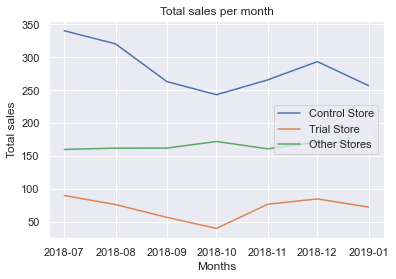

In [36]:
SalesPlot = pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot],axis=1)
#plot the trend line 
plt.plot(SalesPlot)
plt.title('Total sales per month')
plt.xlabel('Months')
plt.ylabel('Total sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)
plt.show

In [37]:
SalesPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,340.4,89.6,159.754086
2018-08-01,320.4,75.8,161.698438
2018-09-01,263.0,56.4,161.817187
2018-10-01,243.0,39.5,171.836965
2018-11-01,265.6,76.3,160.601931
2018-12-01,293.4,84.4,170.947876
2019-01-01,256.8,72.0,168.947222


In [38]:
#visualisation of nCustomers for the respective stores
controlCustPlot = pastSales.loc[pastSales['store_type']=='CONTROL STORE',['TransactionMonth','nCustomers']]
controlCustPlot.set_index('TransactionMonth',inplace=True)
controlCustPlot.rename(columns={'nCustomers':'Control Store'},inplace=True)
trialCustPlot = pastSales.loc[pastSales['store_type']=='TRIAL STORE',['TransactionMonth','nCustomers']]
trialCustPlot.set_index('TransactionMonth',inplace=True)
trialCustPlot.rename(columns={'nCustomers':'Trial Store'},inplace=True)
otherCustPlot =  pastSales.loc[pastSales['store_type']=='OTHER STORES',['TransactionMonth','nCustomers']]
otherCustPlot.set_index('TransactionMonth',inplace=True)
otherCustPlot = pd.DataFrame(otherCustPlot.groupby('TransactionMonth').nCustomers.mean())
otherCustPlot.rename(columns={'nCustomers':'Other Store'},inplace=True)

In [39]:
CustomerPlot = pd.concat([controlCustPlot,trialCustPlot,otherCustPlot],axis=1)
CustomerPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,42,17,22.003891
2018-08-01,40,14,23.000000
2018-09-01,38,13,22.312500
2018-10-01,33,9,23.513619
2018-11-01,38,15,22.173745
2018-12-01,37,13,23.393822
2019-01-01,39,12,23.166667


<function matplotlib.pyplot.show(close=None, block=None)>

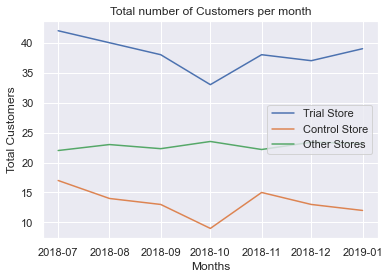

In [40]:
#plot the trend line 
plt.plot(CustomerPlot)
plt.title('Total number of Customers per month')
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.legend(['Trial Store', 'Control Store', 'Other Stores'], loc = 5)
plt.show

it is interesting to visualise a high difference between the trial and control store performance while the correlation constant is high. This could be due to temporal effects. The correlation may be influenced by temporal patterns and seasonality. If both the trial and control stores experience similar trends over time, the correlation may appear high even if there are differences in the absolute values of metrics. The trend line proves the above by showcasing a similar pattern of store trend. Both the stores experienced a downfall in sales and customers in the month of October while picking up in November. 

In [41]:
#pretrial scaling factor
trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','totSales' ].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','totSales'].sum()
scalingFactorForSales = trial_sum/control_sum
scalingFactorForSales

0.24916775950771713

In [42]:
measureOverTimeSales = measureOverTime
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==control_store]
scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales
scaledControlSales.head()

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/647887310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales']= scaledControlSales['totSales'] * scalingFactorForSales


,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,controlSales
1119,94.0,201807,340.4,42,1.119048,3.621277,2.000000,84.816705
1120,94.0,201808,320.4,40,1.100000,3.600000,2.022727,79.833350
1121,94.0,201809,263.0,38,1.000000,3.460526,2.000000,65.531121
1122,94.0,201810,243.0,33,1.060606,3.471429,2.000000,60.547766
1123,94.0,201811,265.6,38,1.078947,3.239024,2.000000,66.178957


In [43]:
#calculate percentage difference between controlled sales and trial sales
percentageDiff = scaledControlSales[['YEAR_MONTH','controlSales']]
percentageDiff.reset_index(drop=True,inplace=True)

#concatenate the trial sales and control sales to calculate percentage difference 
trialSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR']==trial_store,'totSales']
trialSales.reset_index(drop=True,inplace=True)
percentageDiff = pd.concat([percentageDiff,trialSales],axis=1)

In [44]:
percentageDiff.rename(columns = {'totSales':'trialSales'},inplace=True)
percentageDiff

,YEAR_MONTH,controlSales,trialSales
0,201807,84.816705,89.6
1,201808,79.833350,75.8
2,201809,65.531121,56.4
3,201810,60.547766,39.5
4,201811,66.178957,76.3
5,201812,73.105821,84.4
6,201901,63.986281,72.0
7,201902,53.969737,69.1
8,201903,84.617371,58.4
9,201904,63.288611,96.8


In [45]:
#calculating the absolute percentage difference between control sales and total sales for 
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['trialSales'])/ percentageDiff['controlSales']
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff
0,201807,84.816705,89.6,0.056396
1,201808,79.833350,75.8,0.050522
2,201809,65.531121,56.4,0.139340
3,201810,60.547766,39.5,0.347622
4,201811,66.178957,76.3,0.152934
5,201812,73.105821,84.4,0.154491
6,201901,63.986281,72.0,0.125241
7,201902,53.969737,69.1,0.280347
8,201903,84.617371,58.4,0.309834
9,201904,63.288611,96.8,0.529501


In [46]:
percentageDiff.fillna(0,inplace=True)

In [47]:
import statistics
#to calculate the standard deviation for the percentageDiff for pretrial period 

stdDev = statistics.stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH']<201902,'percentageDiff'])
stdDev

0.09864845102566007

In [48]:
stdDev_post = statistics.stdev(percentageDiff.loc[percentageDiff['YEAR_MONTH']>201902,'percentageDiff'])
stdDev_post

0.25454334537063544

The standard deviation for the pre and post trial periods differ by an increase of 157%. To test the null-hypothesis of the pretrial and posttrial periods being the same using the percentage difference column. 

In [49]:
percentageDiff.fillna(0,inplace=True)

The sample size for the pre-trial months is 8 (inclusive of February 2019). To calculate the degrees of freedom for t-test, we have n-1 degrees of freedom where n is 8. 

8-1 = 7 degrees of freedom


In [50]:
from scipy.stats import ttest_rel


In [51]:
t_statistic, p_value = ttest_rel(percentageDiff['trialSales'], percentageDiff['controlSales'])


In [52]:
t_statistic

1.2169488341059722

In [53]:
p_value

0.24701639126039454

The test measures whether the average score differs significantly across samples (e.g. exams). Since the p_value is greater than a significance level of 5% , we cannot reject the null hypothesis of the average score being similar. 

The t-statistic of 1.2169 suggests a positive difference between the group means but does not provide strong evidence against the null hypothesis.
The p-value of 0.247 is relatively high. If the significance level (α) is, for example, 0.05, since 0.24 > 0.05, you would not reject the null hypothesis. This suggests that the observed difference is not statistically significant at the 0.05 significance level.


In [54]:
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff
0,201807,84.816705,89.6,0.056396
1,201808,79.833350,75.8,0.050522
2,201809,65.531121,56.4,0.139340
3,201810,60.547766,39.5,0.347622
4,201811,66.178957,76.3,0.152934
5,201812,73.105821,84.4,0.154491
6,201901,63.986281,72.0,0.125241
7,201902,53.969737,69.1,0.280347
8,201903,84.617371,58.4,0.309834
9,201904,63.288611,96.8,0.529501


In [55]:
percentageDiff.fillna(0,inplace=True)

The test-statistic for t-value = (x - u)/standard deviation; where x is the percentage difference and u is the null-hypothesis (no difference in population mean)

In [56]:
#Assuming the null-hypothesis where is 0 difference between the trial and control stores through the trial and pre trial period
#new column in data frame for t-value
percentageDiff['tvalue'] = (percentageDiff['percentageDiff']-0)/stdDev
percentageDiff



,YEAR_MONTH,controlSales,trialSales,percentageDiff,tvalue
0,201807,84.816705,89.6,0.056396,0.571683
1,201808,79.833350,75.8,0.050522,0.512143
2,201809,65.531121,56.4,0.139340,1.412493
3,201810,60.547766,39.5,0.347622,3.523852
4,201811,66.178957,76.3,0.152934,1.550298
5,201812,73.105821,84.4,0.154491,1.566075
6,201901,63.986281,72.0,0.125241,1.269571
7,201902,53.969737,69.1,0.280347,2.841881
8,201903,84.617371,58.4,0.309834,3.140793
9,201904,63.288611,96.8,0.529501,5.367556


In [57]:
percentageDiff['TransactionMonth']= pd.to_datetime(percentageDiff['YEAR_MONTH'].astype(str), format = '%Y%m')
percentageDiff

,YEAR_MONTH,controlSales,trialSales,percentageDiff,tvalue,TransactionMonth
0,201807,84.816705,89.6,0.056396,0.571683,2018-07-01
1,201808,79.833350,75.8,0.050522,0.512143,2018-08-01
2,201809,65.531121,56.4,0.139340,1.412493,2018-09-01
3,201810,60.547766,39.5,0.347622,3.523852,2018-10-01
4,201811,66.178957,76.3,0.152934,1.550298,2018-11-01
5,201812,73.105821,84.4,0.154491,1.566075,2018-12-01
6,201901,63.986281,72.0,0.125241,1.269571,2019-01-01
7,201902,53.969737,69.1,0.280347,2.841881,2019-02-01
8,201903,84.617371,58.4,0.309834,3.140793,2019-03-01
9,201904,63.288611,96.8,0.529501,5.367556,2019-04-01


In [58]:
percentageDiff.loc[(percentageDiff['YEAR_MONTH']>201901) & (percentageDiff['YEAR_MONTH']<201905)]

,YEAR_MONTH,controlSales,trialSales,percentageDiff,tvalue,TransactionMonth
7,201902,53.969737,69.1,0.280347,2.841881,2019-02-01
8,201903,84.617371,58.4,0.309834,3.140793,2019-03-01
9,201904,63.288611,96.8,0.529501,5.367556,2019-04-01


In [59]:
dof=7
from scipy.stats import t
t.isf(0.05,dof)

1.8945786050613054

The t-values for the trial months are much larger than the 95th percentile, hence disproving the null-hypothesis. The result is an evidence to show that the trial store has performed with significantly larger sales than the control store during the trial period contrary for 2 out of 3 months, contrary to the pre-trial trend.

In [60]:
scaledControlSales

,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,controlSales
1119,94.0,201807,340.4,42,1.119048,3.621277,2.000000,84.816705
1120,94.0,201808,320.4,40,1.100000,3.600000,2.022727,79.833350
1121,94.0,201809,263.0,38,1.000000,3.460526,2.000000,65.531121
1122,94.0,201810,243.0,33,1.060606,3.471429,2.000000,60.547766
1123,94.0,201811,265.6,38,1.078947,3.239024,2.000000,66.178957
1124,94.0,201812,293.4,37,1.081081,3.667500,2.000000,73.105821
1125,94.0,201901,256.8,39,1.025641,3.210000,2.000000,63.986281
1126,94.0,201902,216.6,29,1.137931,3.281818,2.000000,53.969737
1127,94.0,201903,339.6,47,1.063830,3.329412,2.040000,84.617371
1128,94.0,201904,254.0,34,1.088235,3.432432,2.000000,63.288611


In [61]:
#creating trends for the above
pastSales_Control95 = percentageDiff.loc[:,['TransactionMonth','controlSales']]
pastSales_Control95['controlSales'] = pastSales_Control95['controlSales'] * (1+stdDev *2)
pastSales_Control95

,TransactionMonth,controlSales
0,2018-07-01,101.550779
1,2018-08-01,95.584223
2,2018-09-01,78.460208
3,2018-10-01,72.493652
4,2018-11-01,79.235860
5,2018-12-01,87.529373
6,2019-01-01,76.610576
7,2019-02-01,64.617799
8,2019-03-01,101.312116
9,2019-04-01,75.775258


In [62]:
#creating trends for the above
pastSales_Control5 = percentageDiff.loc[:,['TransactionMonth','controlSales']]
pastSales_Control5['controlSales'] = pastSales_Control5['controlSales'] * (1-stdDev *2)
pastSales_Control5

,TransactionMonth,controlSales
0,2018-07-01,68.082632
1,2018-08-01,64.082477
2,2018-09-01,52.602034
3,2018-10-01,48.601879
4,2018-11-01,53.122054
5,2018-12-01,58.682269
6,2019-01-01,51.361986
7,2019-02-01,43.321675
8,2019-03-01,67.922626
9,2019-04-01,50.801964


In [63]:
pastSales_Control95.rename(columns = {'controlSales':' Control 95th confidence interval'},inplace=True)
pastSales_Control5.rename(columns = {'controlSales':' Control 5th confidence interval'},inplace=True)

In [64]:
#extract control sales and transaction month from scaledControlSales
controlSales = percentageDiff.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth',inplace=True)
controlSales.rename(columns={'controlSales':'Control Sales'})
controlSales

,controlSales
TransactionMonth,
2018-07-01,84.816705
2018-08-01,79.833350
2018-09-01,65.531121
2018-10-01,60.547766
2018-11-01,66.178957
2018-12-01,73.105821
2019-01-01,63.986281
2019-02-01,53.969737
2019-03-01,84.617371


In [65]:
#extract control sales and transaction month from scaledControlSales
trialSales = percentageDiff.loc[:,['TransactionMonth','trialSales']]
trialSales.set_index('TransactionMonth',inplace=True)
trialSales.rename(columns={'trialSales':'Trian Sales'})
trialSales

,trialSales
TransactionMonth,
2018-07-01,89.6
2018-08-01,75.8
2018-09-01,56.4
2018-10-01,39.5
2018-11-01,76.3
2018-12-01,84.4
2019-01-01,72.0
2019-02-01,69.1
2019-03-01,58.4


In [66]:
pastSales_Control95.set_index('TransactionMonth',inplace=True)
pastSales_Control5.set_index('TransactionMonth',inplace=True)
combineSales = pd.merge(controlSales, pastSales_Control5, left_index=True, right_index=True)
combineSales = pd.merge(combineSales, pastSales_Control95, left_index=True, right_index=True)
combineSales = pd.merge(combineSales, trialSales, left_index=True, right_index=True)
combineSales

,controlSales,Control 5th confidence interval,Control 95th confidence interval,trialSales
TransactionMonth,,,,
2018-07-01,84.816705,68.082632,101.550779,89.6
2018-08-01,79.833350,64.082477,95.584223,75.8
2018-09-01,65.531121,52.602034,78.460208,56.4
2018-10-01,60.547766,48.601879,72.493652,39.5
2018-11-01,66.178957,53.122054,79.235860,76.3
2018-12-01,73.105821,58.682269,87.529373,84.4
2019-01-01,63.986281,51.361986,76.610576,72.0
2019-02-01,53.969737,43.321675,64.617799,69.1
2019-03-01,84.617371,67.922626,101.312116,58.4


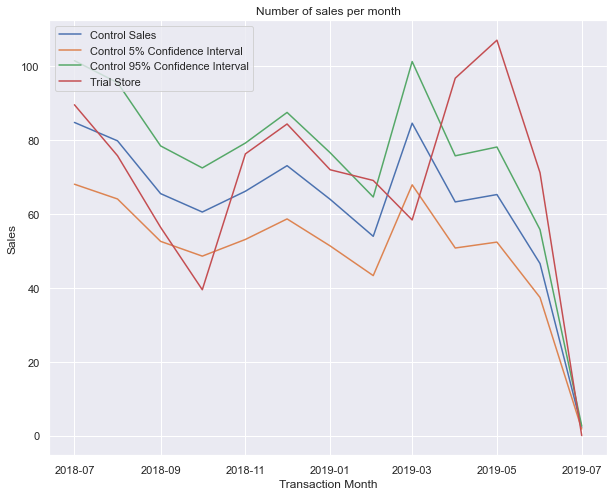

In [67]:
#plot dataframe to visualise trendline
plt.figure(figsize = (10,8))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

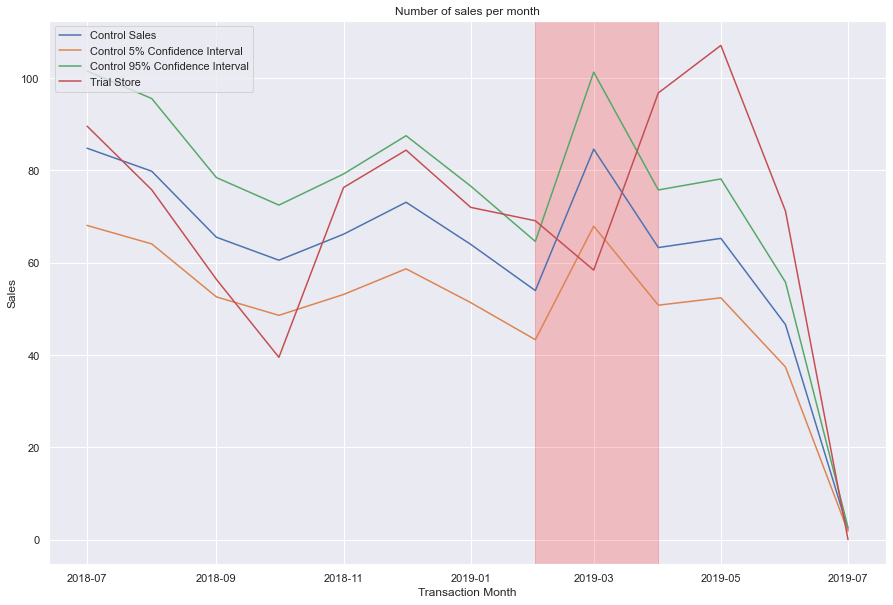

In [68]:
import matplotlib.dates as mdates

#to highlight the trial period 
plt.figure(figsize = (15,10))
plt.plot(combineSales)
plt.xlabel('Transaction Month')
plt.ylabel('Sales')
plt.title('Number of sales per month')
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()

### Customer 

In [69]:
#scaling the number of customers from pre-trial period for trial store and control store
trial_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='TRIAL STORE','nCustomers'].sum()
control_cust_sum = preTrialMeasures.loc[preTrialMeasures['store_type']=='CONTROL STORE','nCustomers'].sum()
scalingFactorForCusts = trial_cust_sum/control_cust_sum
scalingFactorForCusts

0.34831460674157305

In [70]:
#scale the values for customers
measureOverTimeCusts = measureOverTime
scaledControlCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==control_store]
scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts
scaledControlCusts

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/1380990494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['controlCusts']= measureOverTimeCusts['nCustomers'] * scalingFactorForCusts


,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,controlCusts
1119,94.0,201807,340.4,42,1.119048,3.621277,2.000000,14.629213
1120,94.0,201808,320.4,40,1.100000,3.600000,2.022727,13.932584
1121,94.0,201809,263.0,38,1.000000,3.460526,2.000000,13.235955
1122,94.0,201810,243.0,33,1.060606,3.471429,2.000000,11.494382
1123,94.0,201811,265.6,38,1.078947,3.239024,2.000000,13.235955
1124,94.0,201812,293.4,37,1.081081,3.667500,2.000000,12.887640
1125,94.0,201901,256.8,39,1.025641,3.210000,2.000000,13.584270
1126,94.0,201902,216.6,29,1.137931,3.281818,2.000000,10.101124
1127,94.0,201903,339.6,47,1.063830,3.329412,2.040000,16.370787
1128,94.0,201904,254.0,34,1.088235,3.432432,2.000000,11.842697


In [71]:
scaledControlCusts.rename(columns={'controlCusts':'controlCustomers'},inplace=True)
#percentafeDiff for customers
percentageDiff2= scaledControlCusts[['YEAR_MONTH','controlCustomers']]
percentageDiff2.reset_index(drop=True,inplace=True)

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/838426502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts.rename(columns={'controlCusts':'controlCustomers'},inplace=True)


In [72]:
trialCustomers = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,'nCustomers']
trialCustomers.reset_index(drop=True,inplace=True)
percentageDiff2 = pd.concat([percentageDiff2,trialCustomers],axis=1)
percentageDiff2.rename(columns={'nCustomers':'trialCustomers'},inplace=True)
percentageDiff2

,YEAR_MONTH,controlCustomers,trialCustomers
0,201807,14.629213,17.0
1,201808,13.932584,14.0
2,201809,13.235955,13.0
3,201810,11.494382,9.0
4,201811,13.235955,15.0
5,201812,12.887640,13.0
6,201901,13.584270,12.0
7,201902,10.101124,14.0
8,201903,16.370787,13.0
9,201904,11.842697,16.0


In [73]:
#calculate absolute percentage of the difference and add a column to the dataframe
percentageDiff2['percentageDiff']= abs(percentageDiff2['controlCustomers'] - percentageDiff2['trialCustomers'])/percentageDiff2['controlCustomers']
percentageDiff2

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,14.629213,17.0,0.162058
1,201808,13.932584,14.0,0.004839
2,201809,13.235955,13.0,0.017827
3,201810,11.494382,9.0,0.217009
4,201811,13.235955,15.0,0.133277
5,201812,12.887640,13.0,0.008718
6,201901,13.584270,12.0,0.116625
7,201902,10.101124,14.0,0.385984
8,201903,16.370787,13.0,0.205903
9,201904,11.842697,16.0,0.351044


In [74]:
percentageDiff2.fillna(0,inplace=True)

In [76]:
#stdDev
stdDev2 = statistics.stdev(percentageDiff2.loc[percentageDiff2['YEAR_MONTH']<201902,'percentageDiff'])
#tvalue
percentageDiff2['tvalue'] = (percentageDiff2['percentageDiff']-0)/stdDev2
percentageDiff2

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff,tvalue
0,201807,14.629213,17.0,0.162058,1.917841
1,201808,13.932584,14.0,0.004839,0.057263
2,201809,13.235955,13.0,0.017827,0.210967
3,201810,11.494382,9.0,0.217009,2.568139
4,201811,13.235955,15.0,0.133277,1.577232
5,201812,12.887640,13.0,0.008718,0.103176
6,201901,13.584270,12.0,0.116625,1.380174
7,201902,10.101124,14.0,0.385984,4.567841
8,201903,16.370787,13.0,0.205903,2.436704
9,201904,11.842697,16.0,0.351044,4.154342


In [77]:
percentageDiff2.loc[(percentageDiff2['YEAR_MONTH']>201901) & (percentageDiff2['YEAR_MONTH']<201905)]

,YEAR_MONTH,controlCustomers,trialCustomers,percentageDiff,tvalue
7,201902,10.101124,14.0,0.385984,4.567841
8,201903,16.370787,13.0,0.205903,2.436704
9,201904,11.842697,16.0,0.351044,4.154342


In [79]:
#to plot customers per month, create appropriate dataframes
scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEAR_MONTH'].astype(str), format = '%Y%m')
scaledControlCusts.head()

/var/folders/0s/kr_fd7xn5n9fzmqgdw3xr4t00000gn/T/ipykernel_3576/3658916129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCusts['TransactionMonth']= pd.to_datetime(scaledControlCusts['YEAR_MONTH'].astype(str), format = '%Y%m')


,STORE_NBR,YEAR_MONTH,totSales,nCustomers,nChipsPerCust,nUnitPrice,ChipsPerTxn,controlCustomers,TransactionMonth
1119,94.0,201807,340.4,42,1.119048,3.621277,2.000000,14.629213,2018-07-01
1120,94.0,201808,320.4,40,1.100000,3.600000,2.022727,13.932584,2018-08-01
1121,94.0,201809,263.0,38,1.000000,3.460526,2.000000,13.235955,2018-09-01
1122,94.0,201810,243.0,33,1.060606,3.471429,2.000000,11.494382,2018-10-01
1123,94.0,201811,265.6,38,1.078947,3.239024,2.000000,13.235955,2018-11-01


In [81]:
controlCusts = scaledControlCusts.loc[:,['TransactionMonth','controlCustomers']]
controlCusts.set_index('TransactionMonth',inplace=True)
controlCusts.rename(columns={'controlCustomers':'Control Customers'},inplace=True)
measureOverTimeCusts['TransactionMonth']= pd.to_datetime(measureOverTimeCusts['YEAR_MONTH'].astype(str),format='%Y%m')
trialCusts = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR']==trial_store,['TransactionMonth','nCustomers']]
trialCusts.set_index('TransactionMonth',inplace=True)
trialCusts.rename(columns = {'nCustomers':'Trial Customers'},inplace=True)
trialCusts

,Trial Customers
TransactionMonth,
2018-07-01,17
2018-08-01,14
2018-09-01,13
2018-10-01,9
2018-11-01,15
2018-12-01,13
2019-01-01,12
2019-02-01,14
2019-03-01,13


In [82]:
controlCusts['Control 5th confidence interval'] = controlCusts['Control Customers'] * (1 - stdDev * 2)
controlCusts['Control 95th confidence interval'] = controlCusts['Control Customers'] * (1 + stdDev * 2)
combineCusts = pd.merge(controlCusts,trialCusts,left_index=True,right_index=True)
combineCusts

,Control Customers,Control 5th confidence interval,Control 95th confidence interval,Trial Customers
TransactionMonth,,,,
2018-07-01,14.629213,11.742915,17.515512,17
2018-08-01,13.932584,11.183729,16.681440,14
2018-09-01,13.235955,10.624542,15.847368,13
2018-10-01,11.494382,9.226576,13.762188,9
2018-11-01,13.235955,10.624542,15.847368,15
2018-12-01,12.887640,10.344949,15.430332,13
2019-01-01,13.584270,10.904135,16.264404,12
2019-02-01,10.101124,8.108203,12.094044,14
2019-03-01,16.370787,13.140881,19.600692,13


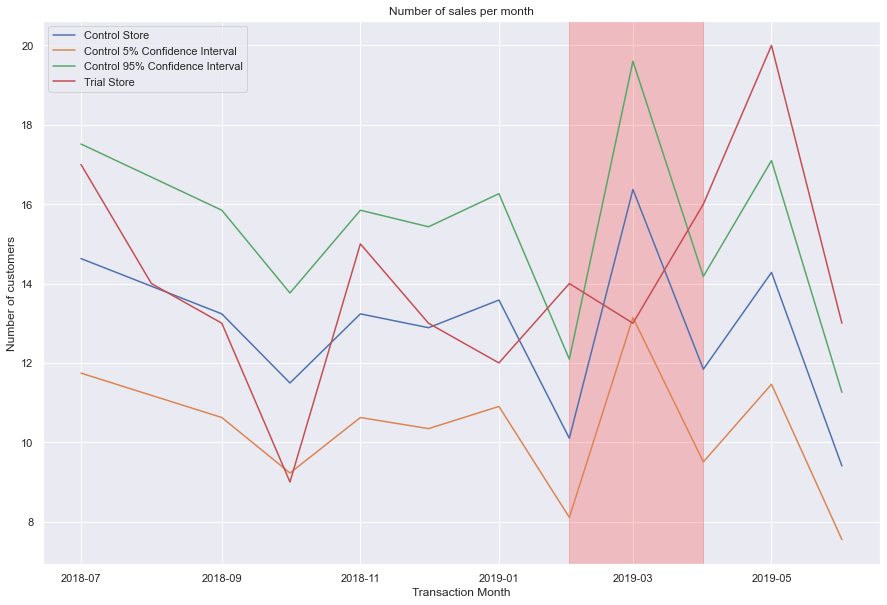

In [83]:
plt.figure(figsize = (15,10))
plt.plot(combineCusts)
plt.xlabel('Transaction Month')
plt.ylabel('Number of customers')
plt.title('Number of sales per month')
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

#to highlight dates use *mdates.datestr2num()
plt.axvspan(*mdates.datestr2num(['2019-02-01','2019-04-01']),color='red',alpha=0.2)
plt.show()